In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets

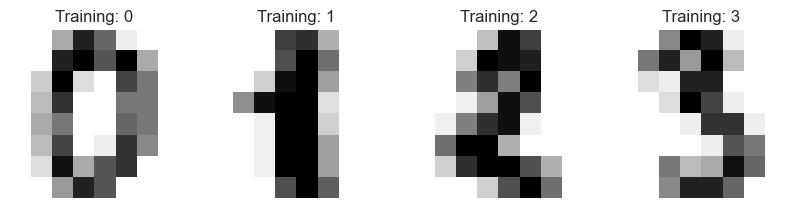

In [5]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [25]:
X = digits.images.reshape(-1, 64)
y = digits.target

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()

model.fit(X_train, y_train)

Learning rate set to 0.080603
0:	learn: 2.1099827	total: 153ms	remaining: 2m 32s
1:	learn: 1.9353892	total: 160ms	remaining: 1m 19s
2:	learn: 1.7912427	total: 166ms	remaining: 55.3s
3:	learn: 1.6499638	total: 173ms	remaining: 43.1s
4:	learn: 1.5388103	total: 179ms	remaining: 35.6s
5:	learn: 1.4452944	total: 185ms	remaining: 30.6s
6:	learn: 1.3659607	total: 191ms	remaining: 27.1s
7:	learn: 1.2911334	total: 197ms	remaining: 24.4s
8:	learn: 1.2295892	total: 204ms	remaining: 22.4s
9:	learn: 1.1657548	total: 210ms	remaining: 20.8s
10:	learn: 1.1057581	total: 216ms	remaining: 19.4s
11:	learn: 1.0490522	total: 222ms	remaining: 18.3s
12:	learn: 0.9970329	total: 229ms	remaining: 17.4s
13:	learn: 0.9500583	total: 237ms	remaining: 16.7s
14:	learn: 0.9107075	total: 244ms	remaining: 16s
15:	learn: 0.8679137	total: 251ms	remaining: 15.4s
16:	learn: 0.8277266	total: 257ms	remaining: 14.9s
17:	learn: 0.7936131	total: 263ms	remaining: 14.3s
18:	learn: 0.7617362	total: 269ms	remaining: 13.9s
19:	learn: 

In [38]:
X_test[3].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 11., 15.,  1.,  0.,  0.],
       [ 0.,  0., 10., 13., 16., 15., 16.,  9.],
       [ 0.,  0.,  3., 12., 16., 16., 11.,  2.]])

In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.95      1.00      0.97        38
           2       1.00      1.00      1.00        38
           3       0.96      1.00      0.98        27
           4       0.94      1.00      0.97        30
           5       0.95      0.93      0.94        42
           6       1.00      0.98      0.99        43
           7       1.00      0.97      0.98        30
           8       0.97      0.88      0.92        33
           9       0.96      1.00      0.98        44

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



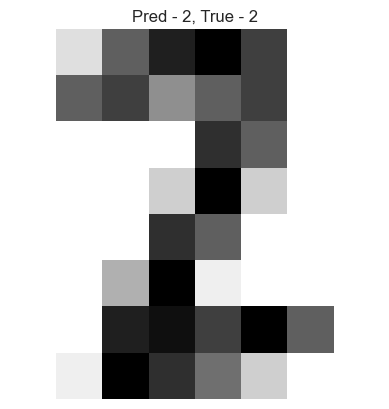

In [131]:
i = 1
plt.axis('off')
plt.title(f"Pred - {model.predict(X_test[i])[0]}, True - {y_test[i]}")
plt.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation="nearest")

In [82]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression

m1 = OneVsRestClassifier(LogisticRegression(max_iter=1000))
m2 = OneVsOneClassifier(LogisticRegression(max_iter=1000))

m1.fit(X_train, y_train)
m2.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

In [134]:
print(classification_report(y_test, m1.predict(X_test.reshape(-1,64))))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.95      0.95      0.95        38
           2       1.00      1.00      1.00        38
           3       1.00      0.96      0.98        27
           4       0.97      1.00      0.98        30
           5       0.95      0.93      0.94        42
           6       1.00      0.98      0.99        43
           7       0.94      0.97      0.95        30
           8       0.82      0.85      0.84        33
           9       0.91      0.91      0.91        44

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [133]:
print(classification_report(y_test, m2.predict(X_test.reshape(-1,64))))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.93      0.97      0.95        38
           2       1.00      1.00      1.00        38
           3       1.00      0.96      0.98        27
           4       0.94      1.00      0.97        30
           5       0.98      0.95      0.96        42
           6       1.00      0.98      0.99        43
           7       1.00      1.00      1.00        30
           8       0.94      0.88      0.91        33
           9       0.96      1.00      0.98        44

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [89]:
X_test.shape

(360, 64)

In [95]:
m1.predict(X_test[i].reshape(1,64))

array([8])

In [115]:
m1.estimator.intercept_

AttributeError: 'LogisticRegression' object has no attribute 'intercept_'

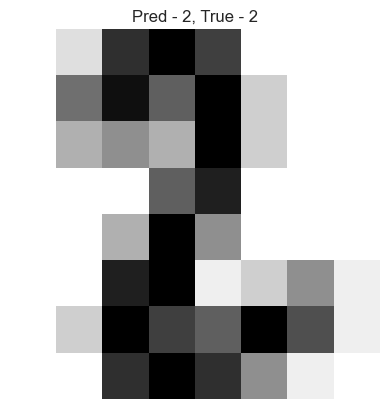

In [101]:
i = 165
plt.axis('off')
plt.title(f"Pred - {m1.predict(X_test[i].reshape(1,64))[0]}, True - {y_test[i]}")
plt.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation="nearest")